In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import spacy

# Documents

In [2]:
data_directories = [
    '../SEC/sec-10-q/data/v1/docs'
]

In [3]:
def find_files(directories, file_type='.txt'):
    files = []
    for directory in directories:
        for root, _, files in os.walk(directory):
            for file in files:
                if file.endswith(file_type):
                    files.append(os.path.join(root, file))
    return files

In [4]:
def get_doc_metadata(docs, file_type='.txt'):
    doc_metadata = {}
    for doc in docs:
        doc = doc.replace(file_type, '')
        for word in doc.split():
            if word not in doc_metadata:
                doc_metadata[word] = 1
            else:
                doc_metadata[word] += 1
    return doc_metadata

In [5]:
docs = find_files(data_directories)

In [6]:
print(get_doc_metadata(docs, file_type='.pdf'))

{'2023': 15, 'Q2': 5, 'INTC': 4, 'Q3': 10, 'AMZN': 4, '2022': 5, 'AAPL': 4, 'Q1': 5, 'MSFT': 4, 'NVDA': 4}


In [9]:
d = get_doc_metadata(docs, file_type='.pdf')
series_docs = pd.Series(d, name='Attribute')

Text(0.5, 1.0, 'Document Metadata')

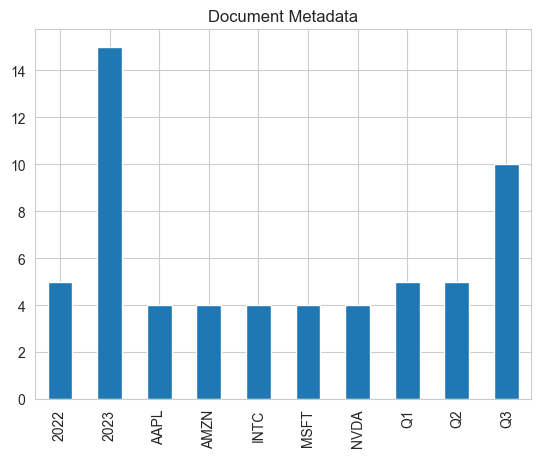

In [10]:
# df_docs.hist(bins=df_docs.unique().shape[0])
series_docs.sort_index(ascending=True, inplace=True)
series_docs.plot.bar()
plt.title('Document Metadata')

# Answer exploration

In [11]:
df_llm = pd.read_csv('../SEC/sec-10-q/data/raw_questions/questions_with_LLM_answers.csv')
df_qa = pd.read_csv('../SEC/sec-10-q/data/v1/qna_data.csv')

In [12]:
df_qa.head()

,Question,Source Docs,Question Type,Source Chunk Type,Answer
0,How has Apple's total net sales changed over t...,*AAPL*,Multi-Doc RAG,Table,"Based on the provided documents, Apple's total..."
1,What are the major factors contributing to the...,*AAPL*,Multi-Doc RAG,Text,In the most recent 10-Q for the quarter ended ...
2,Has there been any significant change in Apple...,*AAPL*,Multi-Doc RAG,Table,"Yes, there has been a change in Apple's operat..."
3,How has Apple's revenue from iPhone sales fluc...,*AAPL*,Multi-Doc RAG,Table,The revenue from iPhone sales for Apple has fl...
4,Can any trends be identified in Apple's Servic...,*AAPL*,Multi-Doc RAG,Table,"Based on the provided documents, there is a tr..."


In [13]:
print(df_qa.shape)

(195, 5)


In [14]:
df_qa.columns

Index(['Question', 'Source Docs', 'Question Type', 'Source Chunk Type',
       'Answer'],
      dtype='object')

In [15]:
df_qa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Question           195 non-null    object
 1   Source Docs        195 non-null    object
 2   Question Type      195 non-null    object
 3   Source Chunk Type  195 non-null    object
 4   Answer             195 non-null    object
dtypes: object(5)
memory usage: 7.7+ KB


  Source Docs  Count
0        AAPL     39
1        AMZN     42
2        INTC     38
3        MSFT     40
4        NVDA     35


<Axes: title={'center': 'Source Docs Queried'}, xlabel='Source Docs'>

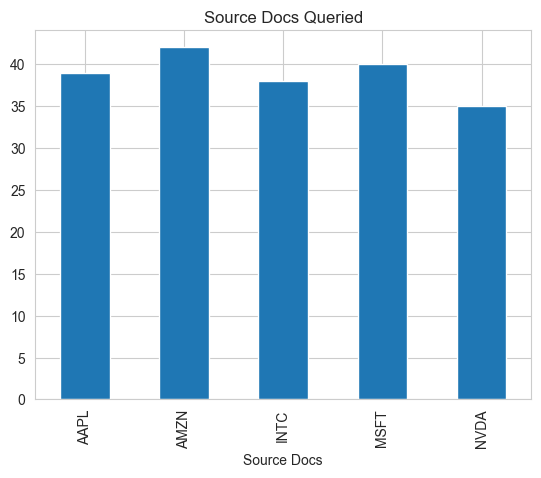

In [76]:
business = ['AAPL', 'MSFT', 'NVDA','INTC','AMZN']
pat = '|'.join(business)
s = df_qa['Source Docs'].str.extract('('+pat+')', expand=False)
df1 = df_qa.groupby(s).size().reset_index(name='Count')
print(df1)
df1.plot.bar(x='Source Docs', y='Count', legend=False, title='Source Docs Queried')


In [90]:
import spacy
from collections import  Counter
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_trf")

def plot_most_common_named_entity_barchart(text, entity="PERSON", n=10):
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(n)))
    sns.barplot(x=y,y=x).set_title(entity)
    return counter

Text(0.5, 1.0, 'Questions asked about each Company')

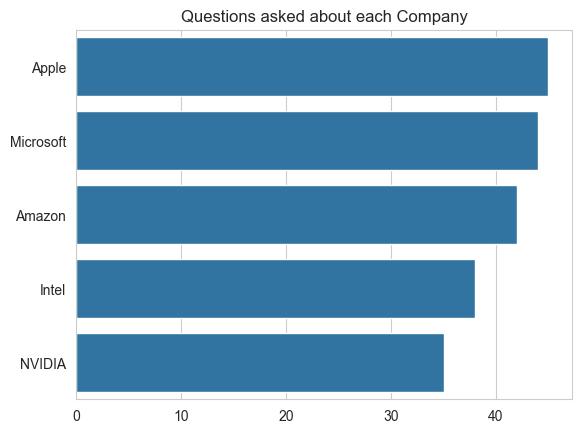

In [91]:
question_counter = plot_most_common_named_entity_barchart(df_qa['Question'], entity='ORG', n=5)
plt.title('Questions asked about each Company')

In [95]:
question_counter.most_common(5)

[('Apple', 45),
 ('Microsoft', 44),
 ('Amazon', 42),
 ('Intel', 38),
 ('NVIDIA', 35)]

Source Docs
*AAPL*            15
*AMZN*            15
*MSFT*            15
*2023 Q3 NVDA*    14
*2023 Q3 MSFT*    14
*2023 Q3 AAPL*    13
*2023 Q3 AMZN*    13
*2023 Q3 INTC*    13
*INTC*            11
*NVDA*             9
*2023 Q1 AMZN*     6
*2023 Q1 NVDA*     5
*2023 Q2 INTC*     5
*2023 Q1 INTC*     5
*2023 Q1 MSFT*     5
*2023 Q1 AAPL*     5
*2023 Q2 AMZN*     5
*2023 Q2 NVDA*     4
*2023 Q2 MSFT*     4
*2023 Q2 AAPL*     4
*2022 Q3 INTC*     4
*2022 Q3 MSFT*     3
*2022 Q3 NVDA*     3
*2022 Q3 AMZN*     3
*2022 Q3 AAPL*     2
Name: count, dtype: int64
______________________________


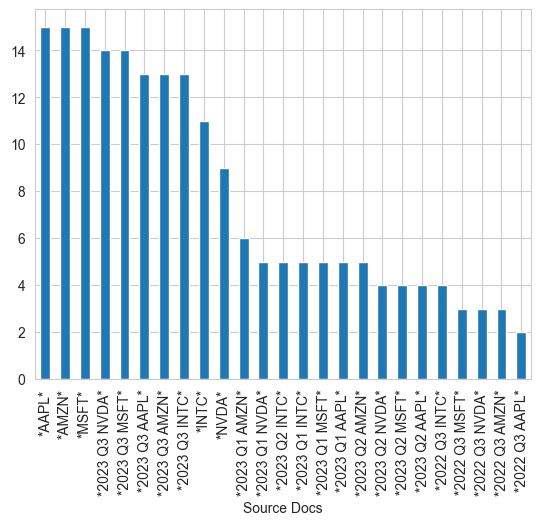

Question Type
Single-Doc Single-Chunk RAG    76
Multi-Doc RAG                  65
Single-Doc Multi-Chunk RAG     54
Name: count, dtype: int64
______________________________


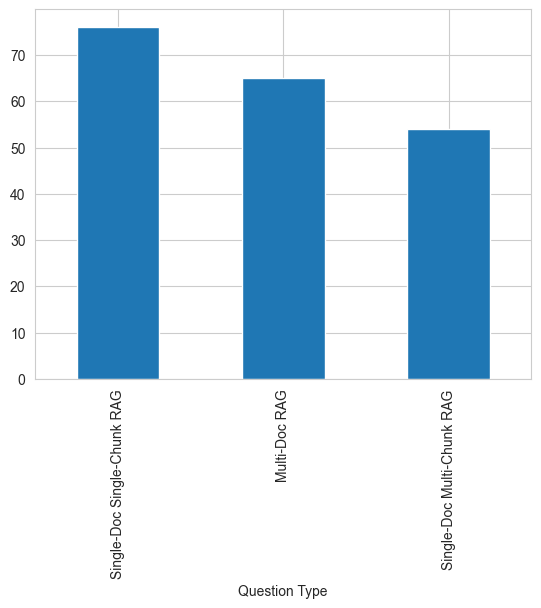

Source Chunk Type
Table    114
Text      81
Name: count, dtype: int64
______________________________


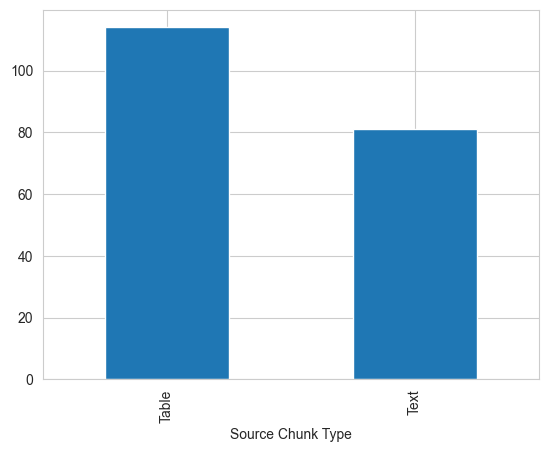

In [16]:
for column in df_qa.columns[1:4]:
    print(df_qa[column].value_counts())
    print("_"*30)
    df_qa[column].value_counts().plot.bar()
    plt.show()

# df_qa['Source Docs'].value_counts().plot.bar()

# Answer Dataframe prep for EDA

In [17]:
# This one had an outlier length of answer at > 20000 words
df_qa.drop([97], inplace=True)

In [18]:
TEXT_COLUMN = 'Answer'
text = df_qa[TEXT_COLUMN]

In [19]:
print(df_qa['Answer'][0])

Based on the provided documents, Apple's total net sales have changed over time as follows:

- For the quarterly period ended June 25, 2022, the total net sales were $82,959 million. (SOURCE: 2022 Q3 AAPL.pdf)
- For the quarterly period ended December 31, 2022, the total net sales were $117,154 million. (SOURCE: 2023 Q1 AAPL.pdf)
- For the quarterly period ended April 1, 2023, the total net sales were $94,836 million. (SOURCE: 2023 Q2 AAPL.pdf)
- For the quarterly period ended July 1, 2023, the total net sales were $81,797 million. (SOURCE: 2023 Q3 AAPL.pdf)

From these figures, it can be observed that there was an increase in total net sales from the quarter ended June 25, 2022, to the quarter ended December 31, 2022. However, there was a subsequent decrease in total net sales in the quarters ended April 1, 2023, and July 1, 2023.

SOURCE(S): 2022 Q3 AAPL.pdf, 2023 Q1 AAPL.pdf, 2023 Q2 AAPL.pdf, 2023 Q3 AAPL.pdf


# Text Statistics

### Character Length Histogram

In [20]:
def plot_character_length_histogram(text):
    text.str.len().hist()

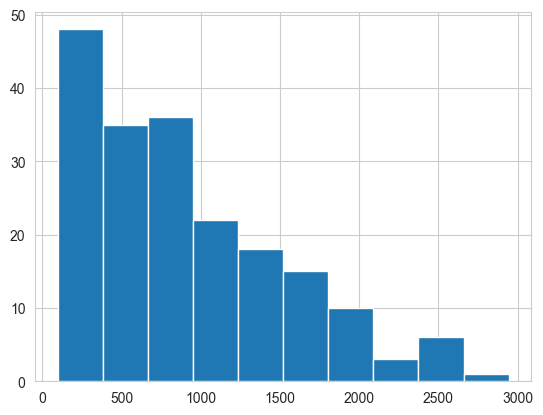

In [21]:
plot_character_length_histogram(text)

### Word Number Histogram

In [22]:
def plot_word_number_histogram(text):
    text.str.split().map(lambda x: len(x)).hist()
    plt.title("Word Number")

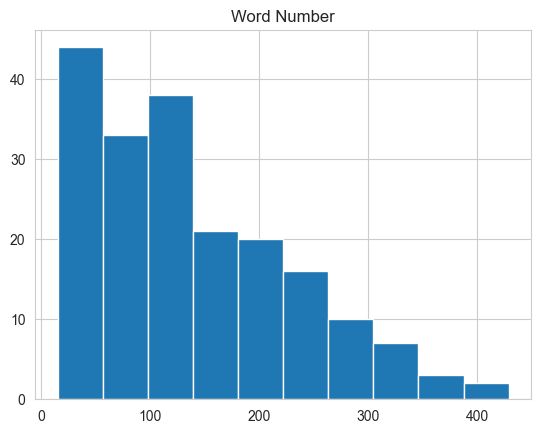

In [23]:
plot_word_number_histogram(text)

### Top Stopwords Barchart

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns

def plot_top_stopwords_barchart(text, n=10):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:n] 
    x,y=zip(*top)
    sns.barplot(y=x,x=y, palette='cividis')

/var/folders/g6/40wbgwl909qgdvwwk7l6jn0c0000gn/T/ipykernel_69115/811194427.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=x,x=y, palette='cividis')


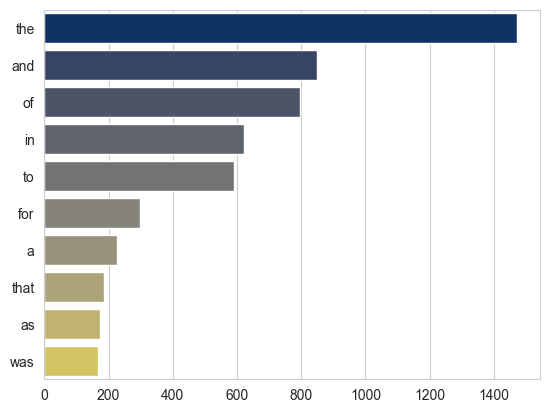

In [25]:
plot_top_stopwords_barchart(text)

### Top Non-Stopwords Barchart

In [26]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
sns.color_palette("viridis", as_cmap=True)

def plot_top_non_stopwords_barchart(text, n=10):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:n]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x, palette='viridis')

/var/folders/g6/40wbgwl909qgdvwwk7l6jn0c0000gn/T/ipykernel_69115/2200216899.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y,y=x, palette='viridis')


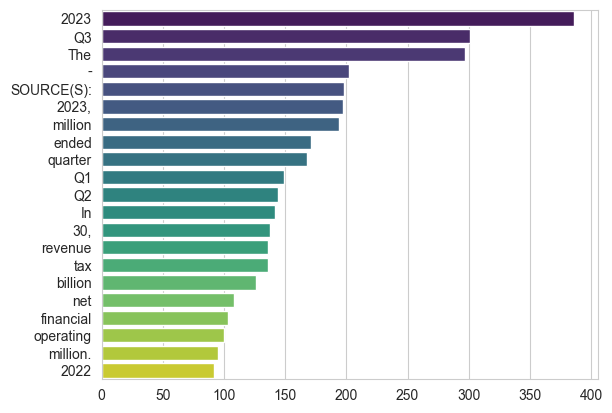

In [27]:
plot_top_non_stopwords_barchart(text, n=40)

# Top N-grams Barchart

In [28]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

### Bigrams

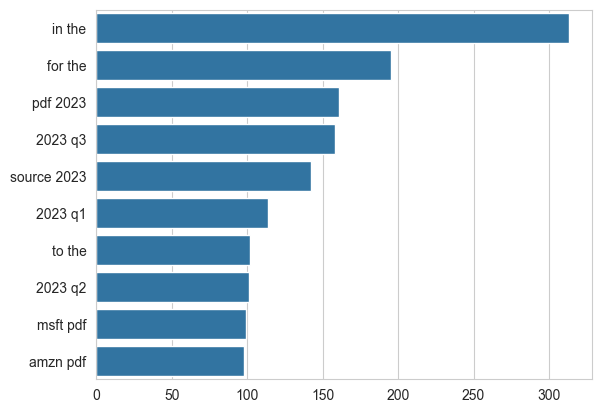

In [29]:
plot_top_ngrams_barchart(text,2)

### Trigrams

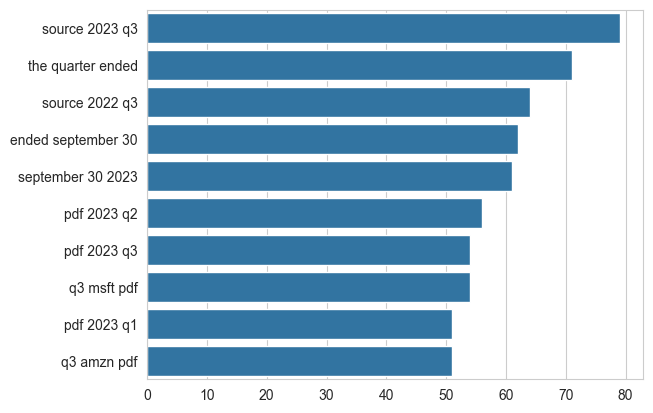

In [30]:
plot_top_ngrams_barchart(text,3)

# Topic Modelling LDA visualization

In [31]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models

def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 1)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    pyLDAvis.save_html(vis, 'lda_result.html')
    return vis

In [32]:
lda_model, bow_corpus, dic = get_lda_objects(text)
lda_model.show_topics()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertgreer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(0,
  '0.034*"million" + 0.034*"2023" + 0.017*"2022" + 0.016*"The" + 0.016*"cash" + 0.015*"inventory" + 0.012*"billion" + 0.012*"debt" + 0.010*"September" + 0.010*"month"'),
 (1,
  '0.049*"2023" + 0.024*"revenue" + 0.020*"expense" + 0.020*"million" + 0.017*"The" + 0.014*"segment" + 0.013*"2022" + 0.013*"SOURCE" + 0.012*"quarter" + 0.012*"billion"'),
 (2,
  '0.052*"2023" + 0.021*"quarter" + 0.018*"ended" + 0.017*"2022" + 0.015*"SOURCE" + 0.013*"million" + 0.012*"The" + 0.011*"MSFT.pdf" + 0.011*"billion" + 0.010*"For"'),
 (3,
  '0.026*"tax" + 0.018*"risk" + 0.017*"The" + 0.015*"2023" + 0.013*"rate" + 0.011*"foreign" + 0.011*"impact" + 0.010*"currency" + 0.009*"Microsoft" + 0.009*"financial"')]

In [33]:
vis = plot_lda_vis(lda_model, bow_corpus, dic)
pyLDAvis.show(vis, local=False)

/Users/robertgreer/Documents/Education/Berkeley/Classes/Datasci210_Capstone/Enterprise-RAG/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=69115) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/robertgreer/Documents/Education/Berkeley/Classes/Datasci210_Capstone/Enterprise-RAG/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=69115) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/robertgreer/Documents/Education/Berkeley/Classes/Datasci210_Capstone/Enterprise-RAG/venv/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=69115) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Users/robertgreer/Documents/Education/Berkeley/Classes/Datasci210_Capstone/Enterprise-R

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [12/Jun/2024 16:22:03] "GET / HTTP/1.1" 200 -



stopping Server...


# Wordcloud

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robertgreer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


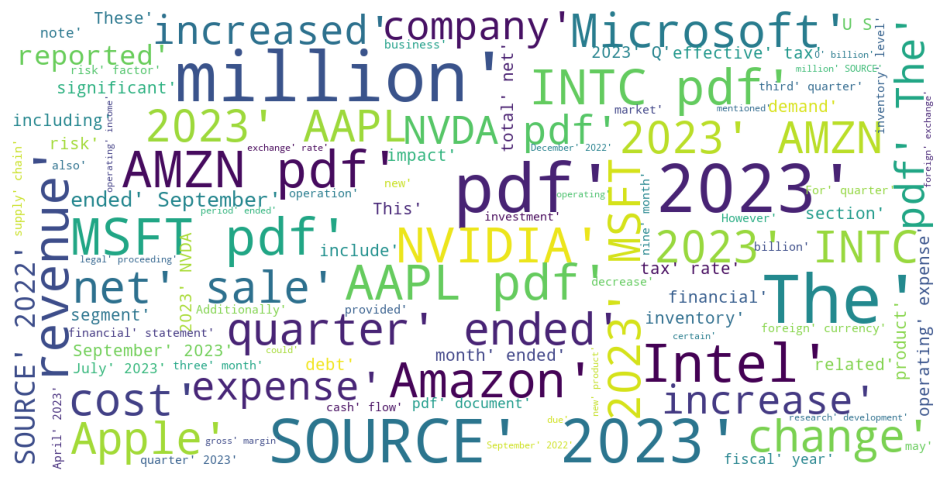

In [45]:
plot_wordcloud(text)

# Text Sentiment

### Polarity Histogram

In [46]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

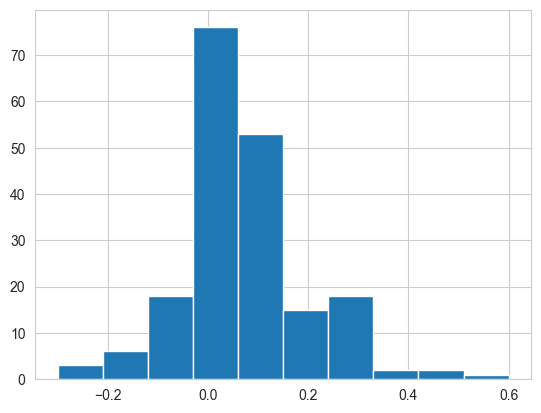

In [47]:
plot_polarity_histogram(text)

### Sentiment Barchart

In [48]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

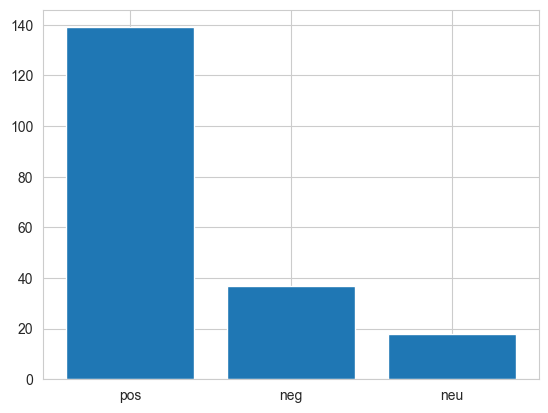

In [49]:
plot_sentiment_barchart(text, method='TextBlob')

# Named Entity Recognition

### Named Entity Barchart

In [50]:
import spacy
from collections import  Counter
import seaborn as sns

def plot_named_entity_barchart(text):
    nlp = spacy.load("en_core_web_sm")
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

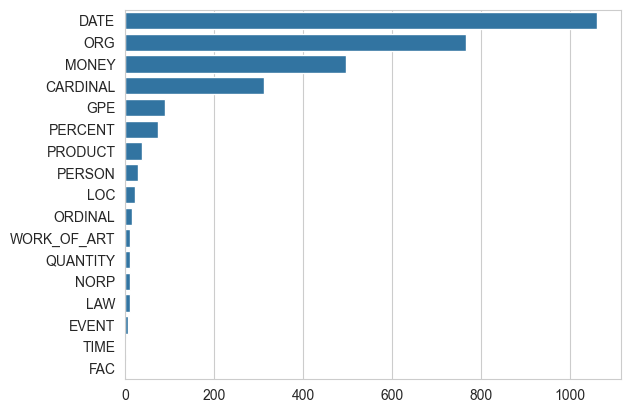

In [51]:
plot_named_entity_barchart(text)

### Most Common Entity Barchart

In [52]:
import spacy
from collections import  Counter
import seaborn as sns
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_trf")

def plot_most_common_named_entity_barchart(text, entity="PERSON", n=10):
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(n)))
    sns.barplot(x=y,y=x).set_title(entity)

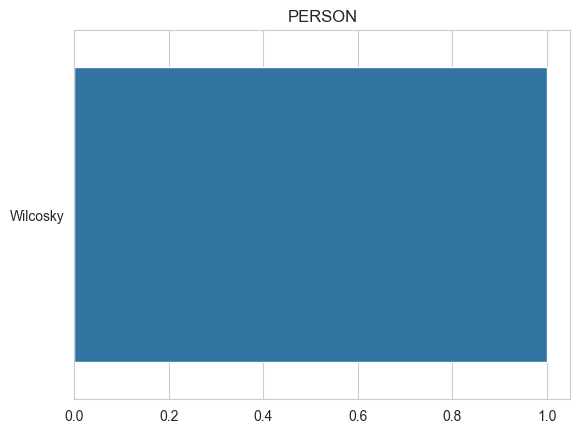

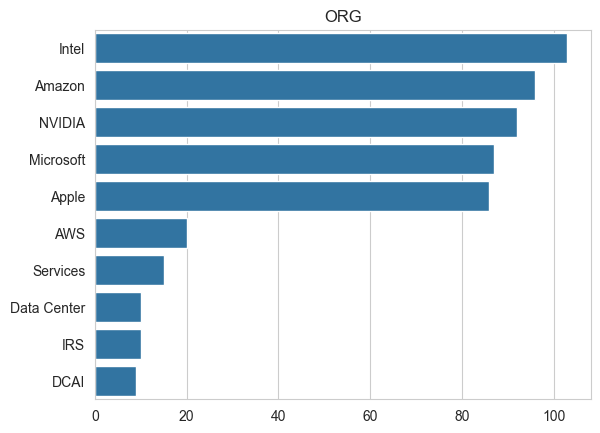

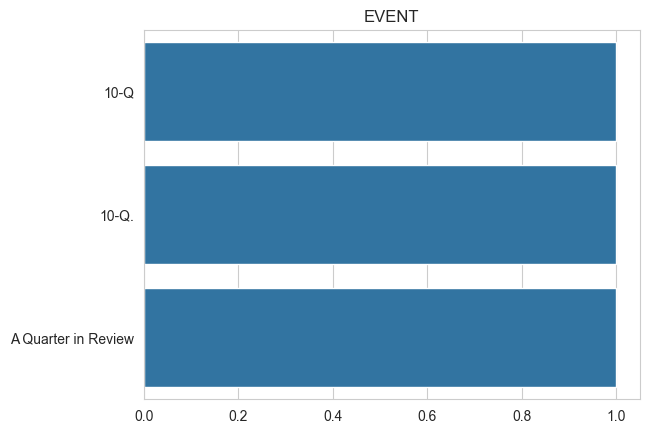

In [53]:
ENTITIES = [
    "PERSON",
    # "NORP",
    # "FAC",
    "ORG",
    # "GPE",
    # "LOC",
    # "PRODUCT",
    "EVENT",
    # "WORK_OF_ART",
    # "LAW",
    # "LANGUAGE",
    # "DATE",
    # "TIME",
    # "PERCENT",
    # "MONEY",
    # "QUANTITY",
    # "ORDINAL",
    # "CARDINAL"
]

for entity in ENTITIES:
    try:
        fig = plt.figure()
        plot_most_common_named_entity_barchart(text, entity)
        plt.show()
    except Exception:
        pass

# Parts of Speach Tagging

### Parts of Speach Barchart

In [54]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
import seaborn as sns
from collections import Counter

def plot_parts_of_speach_barchart(text):

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/robertgreer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


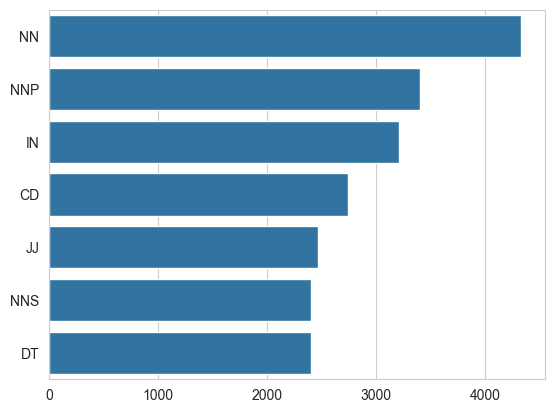

In [55]:
plot_parts_of_speach_barchart(text)

### Most Common Part of Speach Barchart

In [56]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')

import seaborn as sns
from collections import Counter

def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/robertgreer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


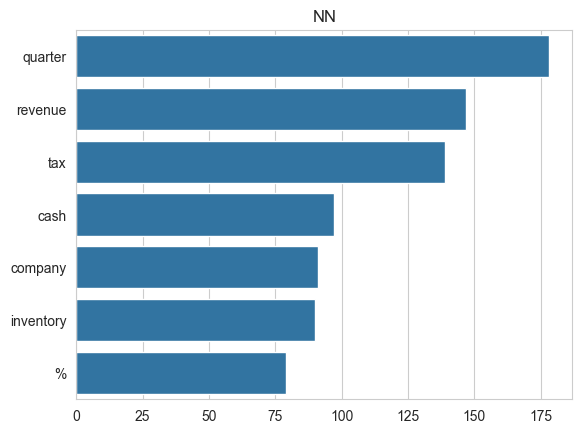

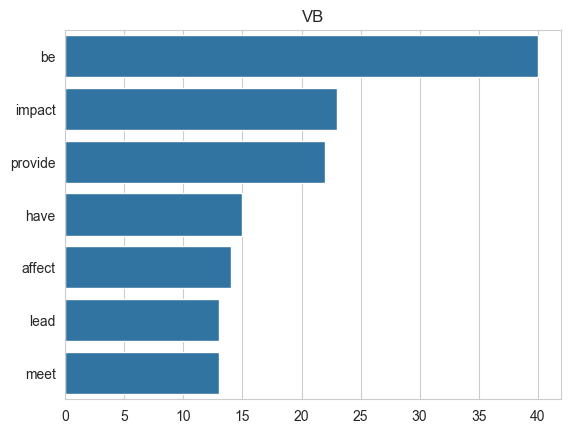

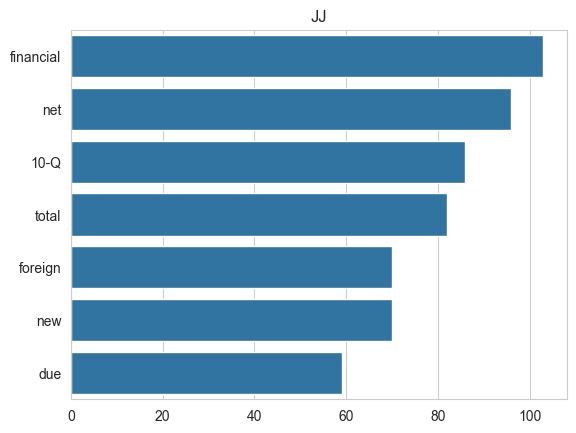

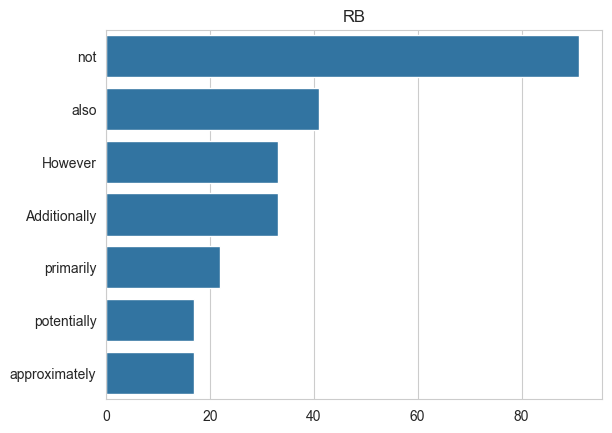

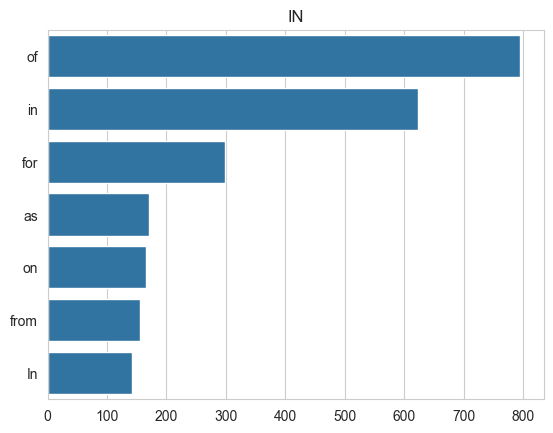

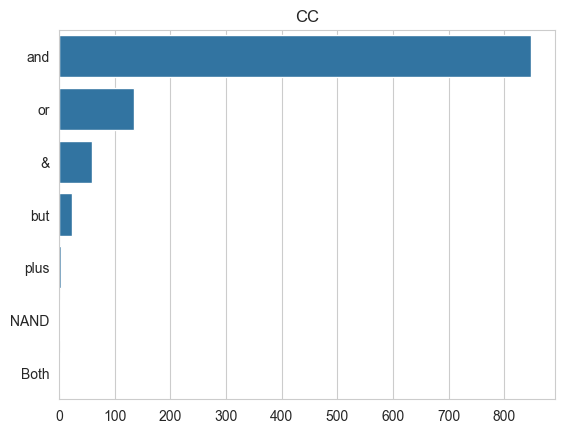

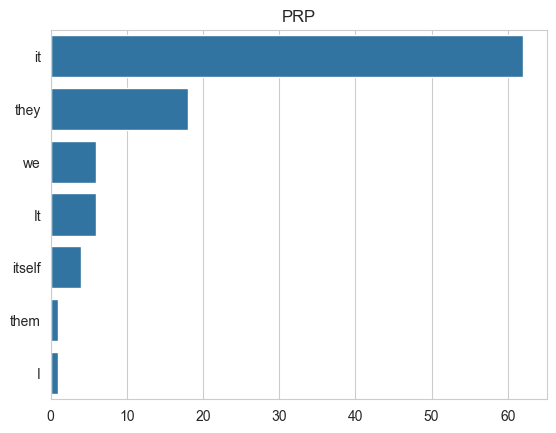

<Figure size 640x480 with 0 Axes>

In [57]:
PARTS_OF_SPEACH = [
    "NN",
    "VB",
    "JJ",
    "RB",
    "IN",
    "CC",
    "PRP",
    "INT",
]

for part_of_speach in PARTS_OF_SPEACH:
    try:
        fig = plt.figure()
        plot_most_common_part_of_speach_barchart(text, part_of_speach)
        plt.show()
    except Exception:
        pass

# Text Complexity

### Text Complexity Histogram

In [58]:
from textstat import flesch_reading_ease

def plot_text_complexity_histogram(text):
    text.apply(lambda x : flesch_reading_ease(x)).hist()

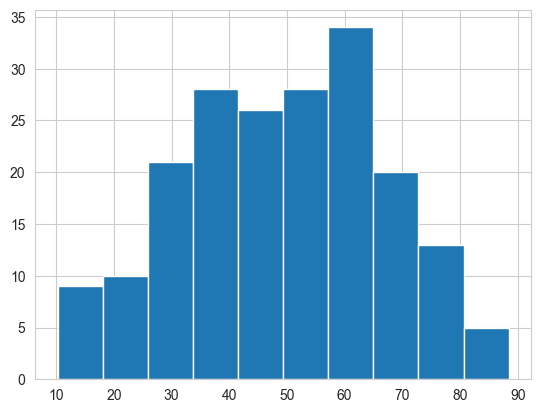

In [59]:
plot_text_complexity_histogram(text)